In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

In [3]:
im = cv2.imread("im.jpg") #opencv function to read images from disk
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # converting my BGR image to an RGB image

In [4]:
print(im.shape)

(1200, 1920, 3)


In [5]:
#unpacking the first two columns in r and c
r, c = im.shape[:2]

In [9]:
out_r = 100
out_c = int(c/r*out_r)

In [12]:
im_final = cv2.resize(im,(out_c,out_r)) # maintaining the aspect ratio of my image while resizing it

In [13]:
pixels = im_final.reshape((-1,3))

In [15]:
print(im_final.shape)

(100, 160, 3)


In [14]:
print(pixels.shape)

(16000, 3)


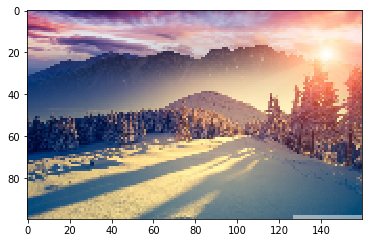

In [16]:
plt.imshow(im_final)

(1200, 1920, 3)
(100, 160, 3)
(16000, 3)


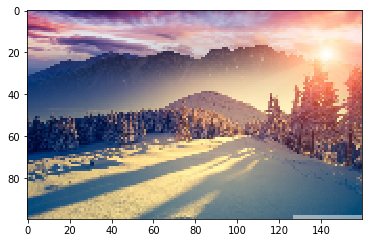

In [2]:
# # im = cv2.imread('./im.jpg')
# # im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# # print(im.shape)

# # r, c = im.shape[:2]
# out_r = 100
# im = cv2.resize(im, (int(out_r*float(c)/r), out_r)) #Keeping the Aspect Ratio of the Image same while resizing
# print(im.shape)

# pixels = im.reshape((-1, 3))
# print(pixels.shape)

# plt.imshow(im)
# plt.show()

In [18]:
km = KMeans(n_clusters=8)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
centr_colors = np.array(km.cluster_centers_,dtype='uint8')
print(centr_colors.dtype)
print(centr_colors)

print(centr_colors.shape)

uint8
[[168 140 135]
 [ 27  45  89]
 [110 116 132]
 [246 218 179]
 [ 62  83 117]
 [222 176 136]
 [142  86  90]
 [197 168 185]]
(8, 3)


In [20]:
freq = np.array(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
print(freq)
print(freq.sum())
freq = freq/pixels.shape[0]
print(freq)

[2575. 1793. 2351. 2440. 2237. 2042. 1342. 1220.]
16000.0
[0.1609375 0.1120625 0.1469375 0.1525    0.1398125 0.127625  0.083875
 0.07625  ]


In [21]:
dom = [[freq[ix], centr_colors[ix]] for ix in range(km.n_clusters)]

DOM = sorted(dom, key=lambda z:z[0], reverse=True)
#DOM = np.array(DOM)
print(DOM[0][1])
#print DOM.shape

[168 140 135]


In [22]:
for ix in DOM:
    print(ix)
    print("----------")

[0.1609375, array([168, 140, 135], dtype=uint8)]
----------
[0.1525, array([246, 218, 179], dtype=uint8)]
----------
[0.1469375, array([110, 116, 132], dtype=uint8)]
----------
[0.1398125, array([ 62,  83, 117], dtype=uint8)]
----------
[0.127625, array([222, 176, 136], dtype=uint8)]
----------
[0.1120625, array([27, 45, 89], dtype=uint8)]
----------
[0.083875, array([142,  86,  90], dtype=uint8)]
----------
[0.07625, array([197, 168, 185], dtype=uint8)]
----------


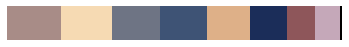

In [25]:
patch = np.ones((100,1000,3)) # a patch which is 100*1000*3 because each pixel has 3 values being R, G and B
start = 0

for i in range(km.n_clusters):
    width = int(DOM[i][0]*patch.shape[1])
    end = start+width
    patch[:,start:end,:] = DOM[i][1]
    start = end
    plt.axis(False)
    plt.imshow(patch/255)
plt.show()

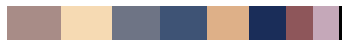

In [8]:
# patch = np.ones((50, 500, 3))
# start = 0
# for ix in range(km.n_clusters):
#     width = int(DOM[ix][0]*patch.shape[1])
#     end = start+width
#     patch[:,start:end,:] = DOM[ix][1]
#     start = end
#     plt.axis("off")
#     plt.imshow(patch/255)
# plt.show()